Simulated task scheduling in a cloud environment using various algorithms like Ant Colony Optimization (ACO) and Particle Swarm Optimization (PSO). The simulation helps in optimizing resource allocation and minimizing execution time in a cloud computing environment.

## **HM**

In [ ]:
pip install simpy

In [ ]:
import random
import numpy as np
import simpy

In [ ]:
# Define tasks and resources (simplified representation)
tasks = [{'id': 1, 'cpu': 5, 'memory': 512, 'time': 10},
         {'id': 2, 'cpu': 3, 'memory': 256, 'time': 8},
         {'id': 3, 'cpu': 4, 'memory': 128, 'time': 5}]

resources = [{'id': 1, 'cpu': 20, 'memory': 2048},
             {'id': 2, 'cpu': 15, 'memory': 1024}]

def first_fit(tasks, resources):
    task_schedule = []
    for task in tasks:
        for resource in resources:
            if resource['cpu'] >= task['cpu'] and resource['memory'] >= task['memory']:
                task_schedule.append((task, resource))
                resources.remove(resource)  # Mark resource as unavailable
                break
        else:
            print("Warning: No available resource to accommodate the task:", task)
    return task_schedule

def calculate_completion_time(task_schedule):
    completion_time = 0
    for task, resource in task_schedule:
        cpu_ratio = resource['cpu'] / task['cpu'] if task['cpu'] != 0 else float('inf')
        memory_ratio = resource['memory'] / task['memory'] if task['memory'] != 0 else float('inf')
        completion_time += task['time'] / min(cpu_ratio, memory_ratio)
    return completion_time

def calculate_resource_utilization(task_schedule):
    total_cpu = sum(resource['cpu'] for _, resource in task_schedule)
    total_memory = sum(resource['memory'] for _, resource in task_schedule)
    used_cpu = sum(task['cpu'] for task, _ in task_schedule)
    used_memory = sum(task['memory'] for task, _ in task_schedule)
    cpu_utilization = used_cpu / total_cpu if total_cpu != 0 else 0
    memory_utilization = used_memory / total_memory if total_memory != 0 else 0
    return cpu_utilization, memory_utilization

# Execute the heuristic algorithm
task_schedule = first_fit(tasks, resources)

# Calculate completion time and print results
hm_completion_time = calculate_completion_time(task_schedule)
cpu_utilization, memory_utilization = calculate_resource_utilization(task_schedule)

print("Task Schedule:", task_schedule)
print("Total Completion Time:", hm_completion_time)
print("CPU Utilization:", cpu_utilization)
print("Memory Utilization:", memory_utilization)


Task Schedule: [({'id': 1, 'cpu': 5, 'memory': 512, 'time': 10}, {'id': 1, 'cpu': 20, 'memory': 2048}), ({'id': 2, 'cpu': 3, 'memory': 256, 'time': 8}, {'id': 2, 'cpu': 15, 'memory': 1024})]
Total Completion Time: 4.5
CPU Utilization: 0.22857142857142856
Memory Utilization: 0.25


## **GA**

In [ ]:
import random

# Define tasks and resources (simplified representation)
tasks = [{'id': 1, 'cpu': 5, 'memory': 512, 'time': 10},
         {'id': 2, 'cpu': 3, 'memory': 256, 'time': 8},
         {'id': 3, 'cpu': 4, 'memory': 128, 'time': 5}]

resources = [{'id': 1, 'cpu': 20, 'memory': 2048},
             {'id': 2, 'cpu': 15, 'memory': 1024}]

# Genetic algorithm parameters
population_size = 10
max_generations = 10
mutation_rate = 0.1

def generate_chromosome():
    # Generate a random task schedule
    return [random.choice(resources) for _ in range(len(tasks))]

def fitness(chromosome):
    # Calculate total completion time for the given task schedule
    completion_time = 0
    for i, task in enumerate(tasks):
        resource = chromosome[i]
        completion_time += task['time'] / min(resource['cpu'] / task['cpu'], resource['memory'] / task['memory'])
    return completion_time

def calculate_resource_utilization(solution):
    # Calculate resource utilization for the given solution
    total_cpu_capacity = sum(resource['cpu'] for resource in resources)
    total_memory_capacity = sum(resource['memory'] for resource in resources)
    used_cpu = sum(task['cpu'] for task, resource in zip(tasks, solution))
    used_memory = sum(task['memory'] for task, resource in zip(tasks, solution))
    cpu_utilization = used_cpu / total_cpu_capacity
    memory_utilization = used_memory / total_memory_capacity
    return cpu_utilization, memory_utilization


def crossover(parent1, parent2):
    # Perform crossover (single-point crossover)
    crossover_point = random.randint(1, len(tasks) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(chromosome):
    # Perform mutation (randomly change one resource assignment)
    mutated_chromosome = chromosome.copy()
    index = random.randint(0, len(tasks) - 1)
    mutated_chromosome[index] = random.choice(resources)
    return mutated_chromosome

def genetic_algorithm():
    # Initialize population
    population = [generate_chromosome() for _ in range(population_size)]

    for generation in range(max_generations):
        # Calculate fitness for each chromosome
        fitness_values = [fitness(chromosome) for chromosome in population]

        # Select parents for crossover
        parents = random.choices(population, weights=[1/fit for fit in fitness_values], k=2)

        # Perform crossover and mutation to generate offspring
        offspring = []
        for _ in range(population_size // 2):
            child1, child2 = crossover(parents[0], parents[1])
            offspring.extend([mutate(child1), mutate(child2)])

        # Replace population with offspring
        population = offspring

        # Output best solution in each generation
        best_solution = min(population, key=fitness)
        print(f"Generation {generation + 1}, Best Solution: {best_solution}, Fitness: {fitness(best_solution)}")

    # Return the best solution found
    return min(population, key=fitness)

best_ga_solution = genetic_algorithm()
print("Best Solution Found:", best_ga_solution)
print("Total Completion Time:", fitness(best_ga_solution))
print("Resource Utilization (CPU, Memory):", calculate_resource_utilization(best_ga_solution))
population = [generate_chromosome() for _ in range(population_size)]

Generation 1, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 2, 'cpu': 15, 'memory': 1024}, {'id': 2, 'cpu': 15, 'memory': 1024}], Fitness: 5.833333333333333
Generation 2, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 2, 'cpu': 15, 'memory': 1024}, {'id': 1, 'cpu': 20, 'memory': 2048}], Fitness: 5.5
Generation 3, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}], Fitness: 4.7
Generation 4, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}], Fitness: 4.7
Generation 5, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}], Fitness: 4.7
Generation 6, Best Solution: [{'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}, {'id': 1, 'cpu': 20, 'memory': 2048}], Fitness: 4.7
Generation 7, Best Solution: [{'id': 1

## **ACO**

In [ ]:
# Parameters
NUM_VMS = 5
NUM_TASKS = 10
NUM_ANTS = 5
NUM_ITERATIONS = 10
EVAPORATION_RATE = 0.5
ALPHA = 1
BETA = 2
Q = 1

class VM:
    def __init__(self, env, name, mips, ram, bw):
        self.env = env
        self.name = name
        self.mips = mips
        self.ram = ram
        self.bw = bw
        self.tasks = []
        self.cpu = simpy.Resource(env, capacity=1)
        self.used_cpu = 0  # Initialize used cpu and ram
        self.used_ram = 0

class Task:
    def __init__(self, env, name, length, fileSize, outputSize):
        self.env = env
        self.name = name
        self.length = length
        self.fileSize = fileSize
        self.outputSize = outputSize

def create_vms(env, num_vms):
    vms = []
    for i in range(num_vms):
        mips = random.randint(500, 2000)
        ram = random.randint(512, 2048)
        bw = random.randint(100, 1000)
        vm = VM(env, f'VM_{i}', mips, ram, bw)
        vms.append(vm)
    return vms

def create_tasks(env, num_tasks):
    tasks = []
    for i in range(num_tasks):
        length = random.randint(100, 1000)
        fileSize = random.randint(100, 500)
        outputSize = random.randint(100, 500)
        task = Task(env, f'Task_{i}', length, fileSize, outputSize)
        tasks.append(task)
    return tasks

def calculate_probabilities(vms, task, pheromone_matrix, vm_indices):
    probabilities = []
    total_probability = 0
    for vm_index in vm_indices:
        pheromone = pheromone_matrix[vm_index]
        heuristic = 1  # Placeholder for heuristic calculation
        probability = pheromone * heuristic
        probabilities.append(probability)
        total_probability += probability
    probabilities = [p / total_probability for p in probabilities]
    return probabilities

def update_pheromone(pheromone_matrix, ant_routes):
    for ant_route in ant_routes:
        for vm_index in ant_route:
            pheromone_matrix[vm_index] += Q

def aco(env, vms, tasks):
    pheromone_matrix = np.ones(NUM_VMS)  # Initialize pheromone matrix
    best_solution = None
    best_completion_time = float('inf')
    for iteration in range(NUM_ITERATIONS):
        ant_routes = []
        for ant in range(NUM_ANTS):
            vm_indices = list(range(NUM_VMS))
            ant_route = []
            while vm_indices:
                probabilities = calculate_probabilities(vms, tasks[ant % NUM_TASKS], pheromone_matrix, vm_indices)
                selected_vm_index = np.random.choice(vm_indices, p=probabilities)
                ant_route.append(selected_vm_index)
                vm_indices.remove(selected_vm_index)
            ant_routes.append(ant_route)
            completion_time = calculate_completion_time(ant_route, vms, tasks)
            if completion_time < best_completion_time:
                best_solution = ant_route
                best_completion_time = completion_time
        update_pheromone(pheromone_matrix, ant_routes)
    return best_solution, best_completion_time

def calculate_completion_time(vm_indices, vms, tasks):
    vm_completion_times = [0] * len(vms)
    for i, vm_index in enumerate(vm_indices):
        vm = vms[vm_index]
        task = tasks[i % len(tasks)]
        vm_completion_time = max(vm_completion_times[vm_index], task.length / vm.mips)
        vm_completion_times[vm_index] = vm_completion_time + task.length / vm.mips
        # Update used CPU and RAM
        vm.used_cpu += task.length / vm.mips
        vm.used_ram += task.outputSize
    return max(vm_completion_times)

def calculate_resource_utilization(vms):
    total_cpu = sum(vm.mips for vm in vms)
    total_ram = sum(vm.ram for vm in vms)
    used_cpu = sum(vm.used_cpu for vm in vms)
    used_ram = sum(vm.used_ram for vm in vms)
    cpu_utilization = used_cpu / total_cpu
    ram_utilization = used_ram / total_ram
    return cpu_utilization, ram_utilization

def main():
    env = simpy.Environment()
    vms = create_vms(env, NUM_VMS)
    tasks = create_tasks(env, NUM_TASKS)
    best_solution, best_completion_aco_time = aco(env, vms, tasks)
    cpu_utilization, ram_utilization = calculate_resource_utilization(vms)
    print("Best Solution Found:", best_solution)
    print("Total Completion Time:", best_completion_aco_time)
    print("CPU Utilization:", cpu_utilization)
    print("RAM Utilization:", ram_utilization)

if __name__ == "__main__":
    main()


Best Solution Found: [0, 4, 3, 2, 1]
Total Completion Time: 0.9758342922899885
CPU Utilization: 0.010741042278688608
RAM Utilization: 11.310840707964601


# PSO

In [ ]:
import simpy
import random
import numpy as np

# Parameters
NUM_VMS = 5
NUM_TASKS = 10
NUM_PARTICLES = 5
NUM_ITERATIONS = 10
MAX_SPEED = 5
C1 = 0.5
C2 = 0.5

class VM:
    def __init__(self, env, name, mips, ram, bw):
        self.env = env
        self.name = name
        self.mips = mips
        self.ram = ram
        self.bw = bw
        self.tasks = []
        self.cpu = simpy.Resource(env, capacity=1)
        self.used_cpu = 0
        self.used_ram = 0

class Task:
    def __init__(self, env, name, length, cpu, ram):
        self.env = env
        self.name = name
        self.length = length
        self.cpu = cpu
        self.ram = ram

def create_vms(env, num_vms):
    vms = []
    for i in range(num_vms):
        mips = random.randint(500, 2000)
        ram = random.randint(512, 2048)
        bw = random.randint(100, 1000)
        vm = VM(env, f'VM_{i}', mips, ram, bw)
        vms.append(vm)
    return vms

def create_tasks(env, num_tasks):
    tasks = []
    for i in range(num_tasks):
        length = random.randint(100, 1000)
        cpu = random.randint(1, 5)  # Adjust as needed
        ram = random.randint(100, 500)  # Adjust as needed
        task = Task(env, f'Task_{i}', length, cpu, ram)
        tasks.append(task)
    return tasks

def evaluate_fitness(particle, vms, tasks):
    # Placeholder for fitness evaluation
    return random.randint(0, 100)

def pso(env, vms, tasks):
    global_best_solution = None
    global_best_fitness = float('inf')
    particles = []
    velocities = []
    for _ in range(NUM_PARTICLES):
        particle = np.random.permutation(len(tasks))
        particles.append(particle)
        velocity = np.random.uniform(-MAX_SPEED, MAX_SPEED, len(tasks))
        velocities.append(velocity)
    print("Particles:", particles)
    print("Velocities:", velocities)
    for iteration in range(NUM_ITERATIONS):
        for i, particle in enumerate(particles):
            fitness = evaluate_fitness(particle, vms, tasks)
            if fitness < global_best_fitness:
                global_best_solution = particle
                global_best_fitness = fitness
            for j in range(len(tasks)):
                velocity_component1 = C1 * random.random() * (global_best_solution[j] - particle[j])
                velocity_component2 = C2 * random.random() * (particles[i][j] - particle[j])
                velocities[i][j] = min(MAX_SPEED, velocities[i][j] + velocity_component1 + velocity_component2)
                particles[i][j] = max(0, min(len(tasks) - 1, particle[j] + int(velocities[i][j])))
    return global_best_solution, global_best_fitness, particles  # Return particles as well

def calculate_total_completion_time(solution, vms, tasks):
    vm_times = [0] * len(vms)
    for i, task_index in enumerate(solution):
        vm_index = i % NUM_VMS
        vm_time = vm_times[vm_index]
        task = tasks[task_index]
        task_time = task.length / vms[vm_index].mips
        vm_times[vm_index] = max(vm_time, task_time) + task_time
        vms[vm_index].used_cpu += task.cpu
        vms[vm_index].used_ram += task.ram
    return max(vm_times)

def calculate_resource_utilization(vms):
    total_cpu = sum(vm.mips for vm in vms)
    total_ram = sum(vm.ram for vm in vms)
    used_cpu = sum(vm.used_cpu for vm in vms)
    used_ram = sum(vm.used_ram for vm in vms)
    cpu_utilization = used_cpu / total_cpu
    ram_utilization = used_ram / total_ram
    return cpu_utilization, ram_utilization

def main():
    env = simpy.Environment()
    vms = create_vms(env, NUM_VMS)
    tasks = create_tasks(env, NUM_TASKS)
    best_solution, best_fitness, particles = pso(env, vms, tasks)  # Receive particles here
    total_completion_pso_time = calculate_total_completion_time(best_solution, vms, tasks)
    cpu_utilization, ram_utilization = calculate_resource_utilization(vms)


    print("Best Solution Found:", best_solution)
    print("Total Fitness:", best_fitness)
    print("Total Completion Time:", total_completion_pso_time)
    print("CPU Utilization:", cpu_utilization)
    print("RAM Utilization:", ram_utilization)

if __name__ == "__main__":
    main()


Particles: [array([7, 9, 6, 0, 1, 8, 3, 4, 2, 5]), array([1, 2, 5, 0, 7, 8, 3, 6, 4, 9]), array([0, 5, 3, 1, 7, 9, 4, 8, 6, 2]), array([4, 6, 2, 3, 9, 0, 8, 7, 5, 1]), array([5, 6, 8, 0, 4, 7, 9, 1, 2, 3])]
Velocities: [array([ 0.39693507,  2.25971805, -1.20569466, -0.86785243, -0.91884824,
        3.50428731, -4.81430323, -4.19562168, -4.05517963, -0.87002131]), array([ 4.2788614 , -2.6223903 , -3.88635805,  1.0482386 ,  3.10423549,
       -3.04122368,  4.92841859, -0.17572497,  0.48900202, -2.36683456]), array([-3.70367166, -0.54904302,  4.40873652,  3.18880715,  0.23933086,
        3.47820299,  3.71293309, -4.48021823,  1.37576836, -2.71348523]), array([-1.434954  , -4.78825639,  1.57273248, -0.55988645, -1.15571074,
       -1.8309006 , -1.55761879, -1.51875686, -4.64737114,  2.92357301]), array([ 2.32081124, -1.09358626,  1.4233049 ,  0.68230605, -3.01541381,
        1.68328798,  1.12425987,  0.70250442,  4.41069655, -1.5292289 ])]
Best Solution Found: [9 0 8 9 0 9 9 9 9 0]
Total F

# Comparison on the basis of completion time and resource utlization.


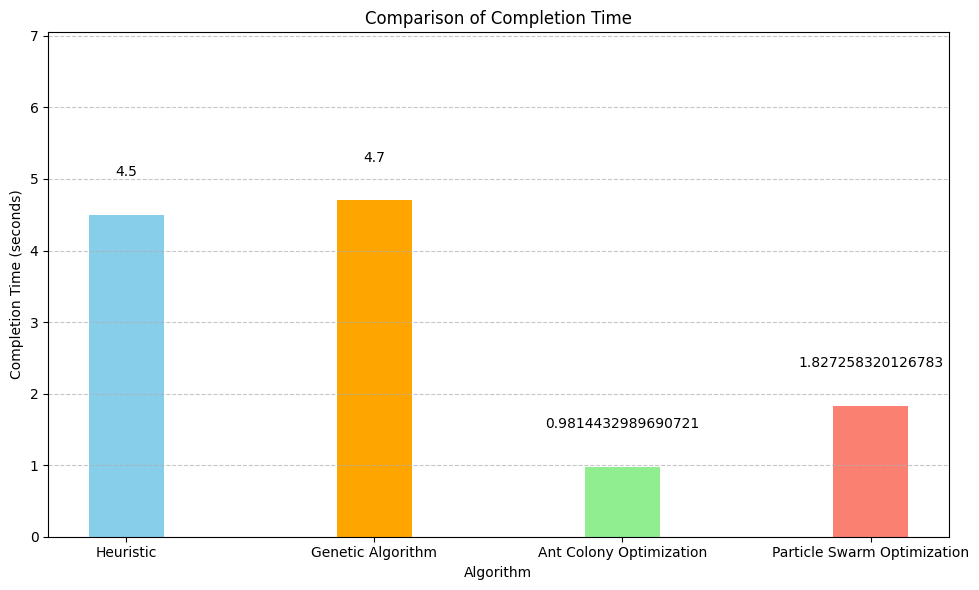

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison(heuristic_completion_time, ga_completion_time, aco_completion_time, pso_completion_time):
    plt.figure(figsize=(10, 6))
    algorithms = ['Heuristic', 'Genetic Algorithm', 'Ant Colony Optimization', 'Particle Swarm Optimization']
    completion_times = [heuristic_completion_time, ga_completion_time, aco_completion_time, pso_completion_time]
    colors = ['skyblue', 'orange', 'lightgreen', 'salmon']
    bar_width = 0.3
    x_pos = range(len(algorithms))
    plt.bar(x_pos, completion_times, color=colors, width=bar_width)
    plt.xlabel('Algorithm')
    plt.ylabel('Completion Time (seconds)')
    plt.title('Comparison of Completion Time')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, max(completion_times) * 1.5)  # Adjust y-axis limit for better visualization
    for i, time in zip(x_pos, completion_times):
        plt.text(i, time + 0.5, str(time), ha='center', va='bottom', fontsize=10)
    plt.xticks(x_pos, algorithms)
    plt.tight_layout()
    plt.show()

heuristic_completion_time = 4.5
ga_completion_time = 4.7
aco_completion_time = 0.9814432989690721
pso_completion_time = 1.827258320126783

plot_comparison(heuristic_completion_time, ga_completion_time, aco_completion_time, pso_completion_time)


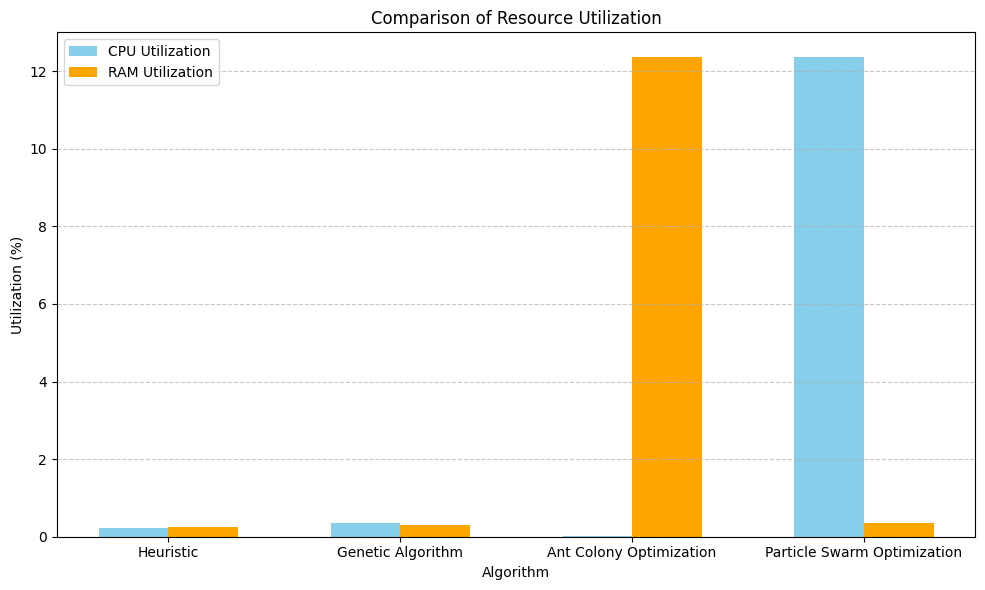

In [ ]:
import matplotlib.pyplot as plt

def plot_resource_utilization(cpu_utilization, ram_utilization, algorithms):
    plt.figure(figsize=(10, 6))
    bar_width = 0.3
    x_pos = range(len(algorithms))

    cpu_color = 'skyblue'
    ram_color = 'orange'

    plt.bar(x_pos, cpu_utilization, color=cpu_color, width=bar_width, label='CPU Utilization')
    plt.bar([x + bar_width for x in x_pos], ram_utilization, color=ram_color, width=bar_width, label='RAM Utilization')

    plt.xlabel('Algorithm')
    plt.ylabel('Utilization (%)')
    plt.title('Comparison of Resource Utilization')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 13)
    plt.xticks([x + bar_width / 2 for x in x_pos], algorithms)
    plt.legend()
    plt.tight_layout()
    plt.show()

cpu_utilization = [0.2285714285714285, 0.34285714285714286, 0.012255248011758707, 12.35250737463127]
ram_utilization = [0.25,  0.2916666666666667, 12.35250737463127 , 0.3510747185261003]
algorithms = ['Heuristic', 'Genetic Algorithm', 'Ant Colony Optimization', 'Particle Swarm Optimization']

plot_resource_utilization(cpu_utilization, ram_utilization, algorithms)
